In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('/home/mca/Downloads/BTC-USD (1).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-10,21376.912109,21760.275391,21168.722656,21680.539063,21680.539063,36913738894
1,2022-09-11,21678.542969,21770.552734,21406.945313,21769.255859,21769.255859,34493951963
2,2022-09-12,21770.148438,22439.181641,21603.896484,22370.449219,22370.449219,50212088965
3,2022-09-13,22371.480469,22673.820313,20062.669922,20296.707031,20296.707031,51091116622
4,2022-09-14,20184.554688,20467.201172,19793.396484,20241.089844,20241.089844,37872380889


In [5]:
df.shape

(366, 7)

In [5]:

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,23873.157798,24238.602454,23515.342309,23886.141426,23886.141426,2.243082e+10
std,4741.310290,4810.539353,4685.858991,4741.889176,4741.889176,1.343404e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,5.481314e+09
25%,19428.610840,19668.903321,19135.375489,19427.987793,19427.987793,1.337442e+10
50%,24405.437500,25109.953126,24023.046875,24500.977539,24500.977539,1.886043e+10
75%,28067.094239,28508.125000,27443.696777,28075.270019,28075.270019,2.746067e+10
max,31474.720703,31814.515625,30659.355469,31476.048828,31476.048828,1.189925e+11


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


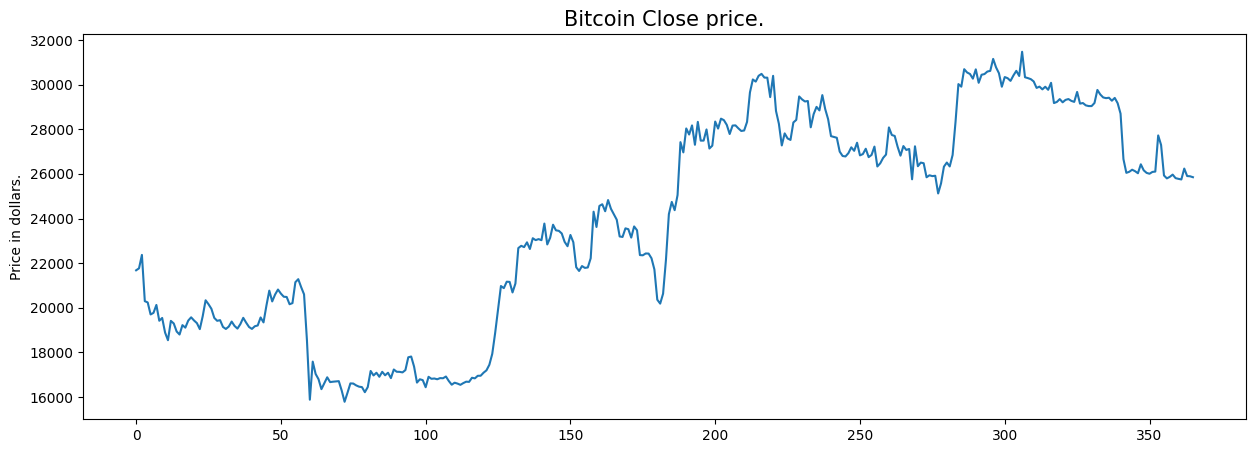

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
File ~/.local/lib/python3.10/site-packages/pandas/core/ops/common.py:81, in _unpack_zerodim_and_defer.<locals>.new_method(
    self=0      2022-09-10
1      2022-09-11
2      2022-...2023-09-10
Name: Date, Length: 366, dtype: object,
    other=Timestamp('2022-09-10 00:00:00')
)
     77             return NotImplemented
     79 other = item_from_zerodim(other)
---> 81 return method(self, other)
        other = Timestamp('2022-09-10 00:00:00')
        method = <function OpsMixin.__ge__ at 0x7fc160b9b2e0>
        self = 0      2022-09-10
1      2022-09-11
2      2022-09-12
3      2022-09-13
4      2022-09-14
          ...    
361    2023-09-06
362    2023-09-07
363    2023-09-08
364    2023-09-09
365    2023-09-10
Name: Date, Length: 366, dtype: object

File ~/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:60, in OpsMixin.__g

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
File ~/.local/lib/python3.10/site-packages/pandas/core/ops/common.py:81, in _unpack_zerodim_and_defer.<locals>.new_method(
    self=0      2022-09-10
1      2022-09-11
2      2022-...2023-09-10
Name: Date, Length: 366, dtype: object,
    other=Timestamp('2022-10-11 16:08:29')
)
     77             return NotImplemented
     79 other = item_from_zerodim(other)
---> 81 return method(self, other)
        other = Timestamp('2022-10-11 16:08:29')
        method = <function OpsMixin.__ge__ at 0x7fc160b9b2e0>
        self = 0      2022-09-10
1      2022-09-11
2      2022-09-12
3      2022-09-13
4      2022-09-14
          ...    
361    2023-09-06
362    2023-09-07
363    2023-09-08
364    2023-09-09
365    2023-09-10
Name: Date, Length: 366, dtype: object

File ~/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:60, in OpsMixin.__g

In [6]:

plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [8]:

df[df['Close'] == df['Adj Close']].shape, df.shape

((366, 7), (366, 7))

In [9]:
df = df.drop(['Adj Close'], axis=1)

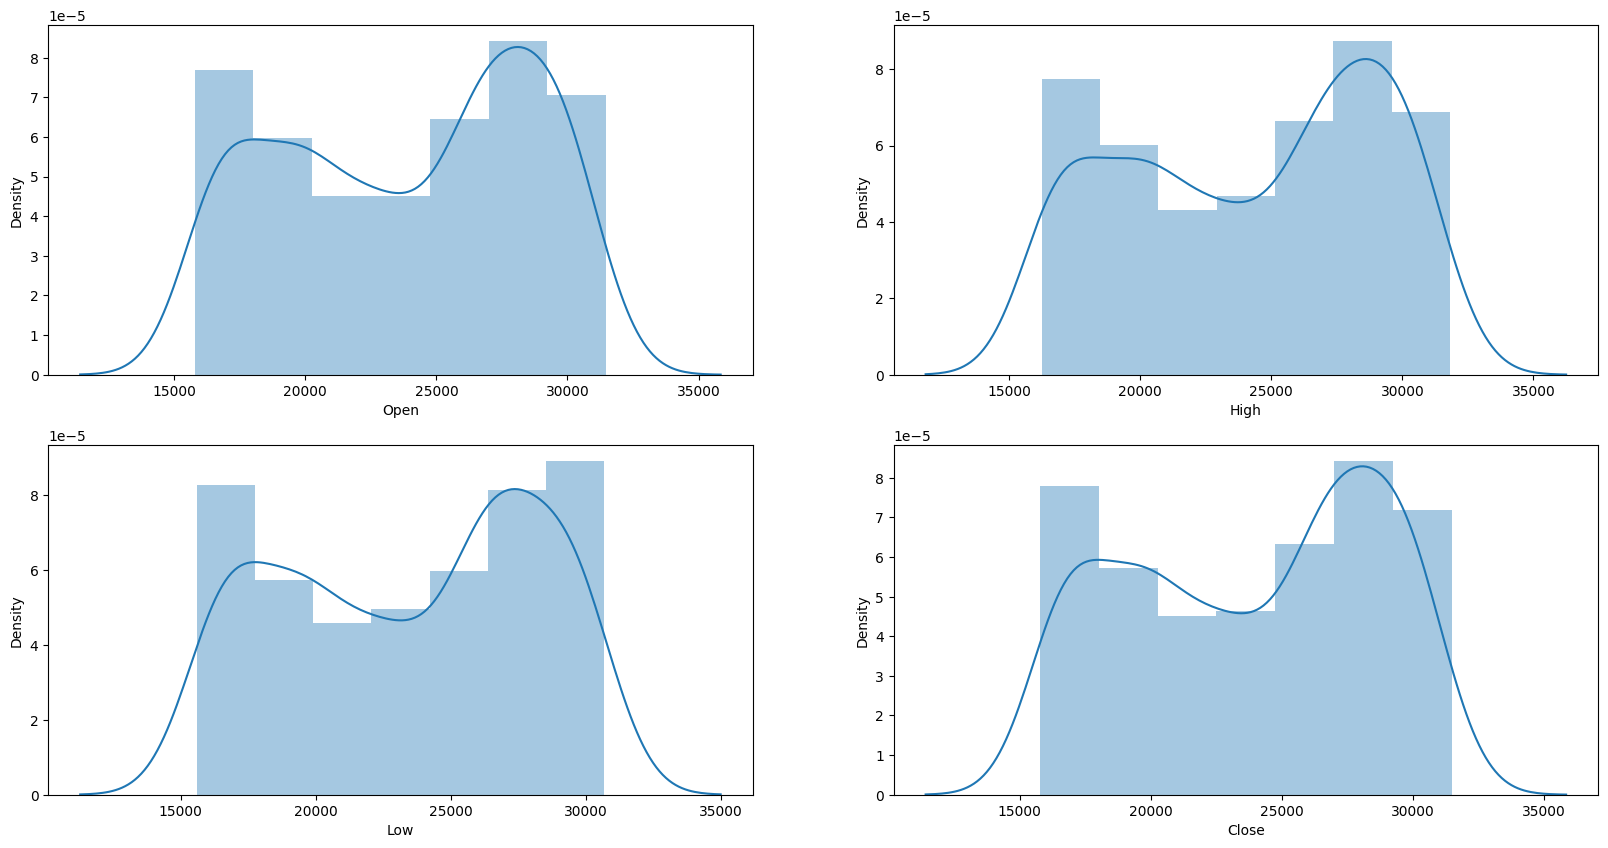

In [10]:

features = ['Open', 'High', 'Low', 'Close']
 
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()

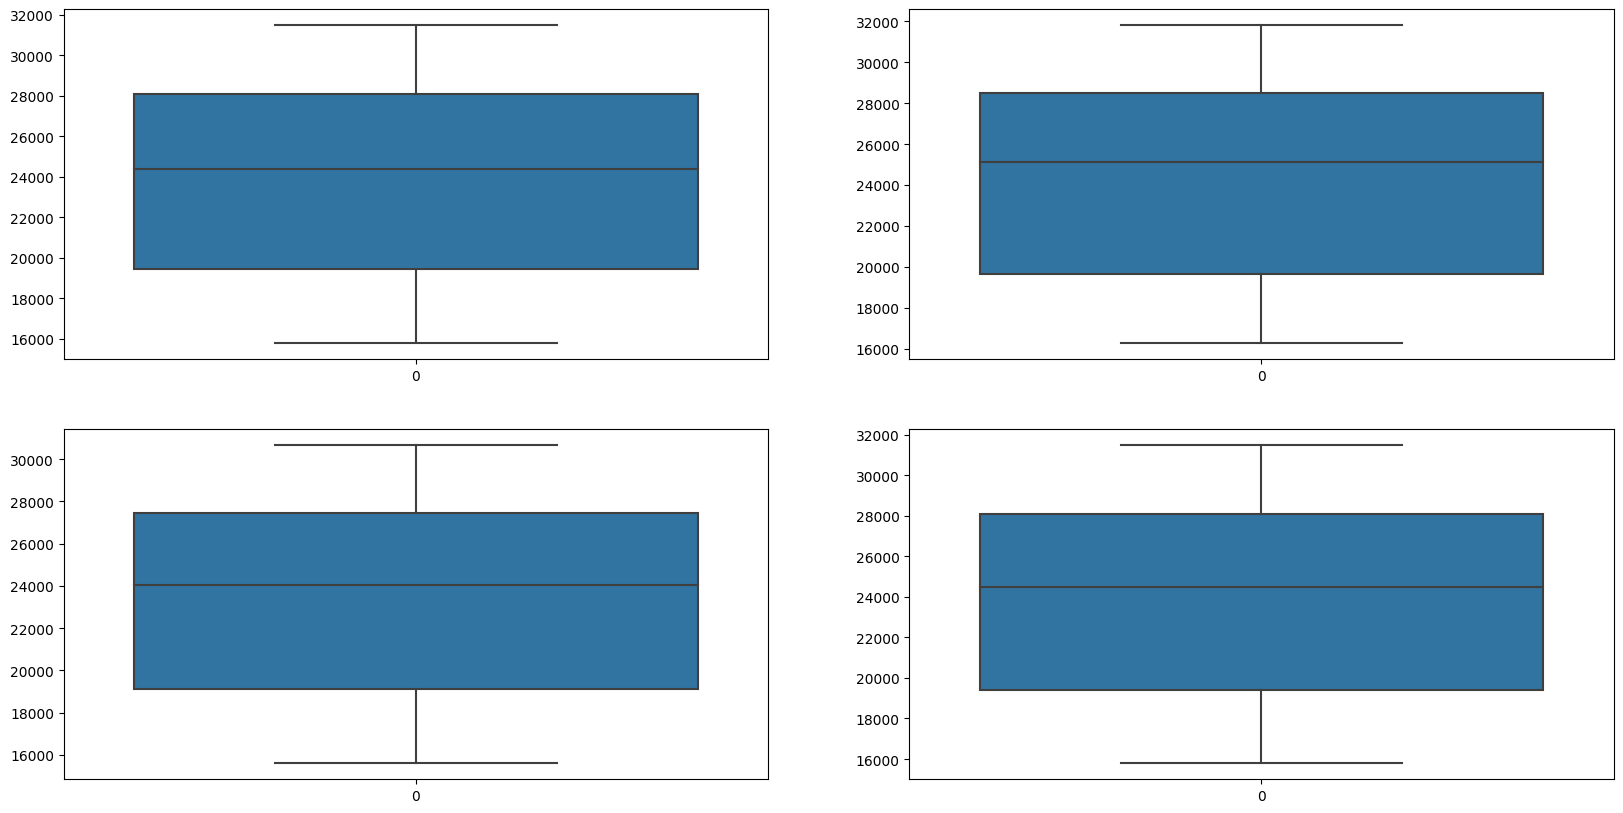

In [11]:

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()

In [12]:

splitted = df['Date'].str.split('-', expand=True)
 
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')
 
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2022-09-10,21376.912109,21760.275391,21168.722656,21680.539063,36913738894,2022,9,10
1,2022-09-11,21678.542969,21770.552734,21406.945313,21769.255859,34493951963,2022,9,11
2,2022-09-12,21770.148438,22439.181641,21603.896484,22370.449219,50212088965,2022,9,12
3,2022-09-13,22371.480469,22673.820313,20062.669922,20296.707031,51091116622,2022,9,13
4,2022-09-14,20184.554688,20467.201172,19793.396484,20241.089844,37872380889,2022,9,14


In [13]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2022-09-10,21376.912109,21760.275391,21168.722656,21680.539063,36913738894,2022,9,10,1
1,2022-09-11,21678.542969,21770.552734,21406.945313,21769.255859,34493951963,2022,9,11,1
2,2022-09-12,21770.148438,22439.181641,21603.896484,22370.449219,50212088965,2022,9,12,1
3,2022-09-13,22371.480469,22673.820313,20062.669922,20296.707031,51091116622,2022,9,13,1
4,2022-09-14,20184.554688,20467.201172,19793.396484,20241.089844,37872380889,2022,9,14,1


In [14]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


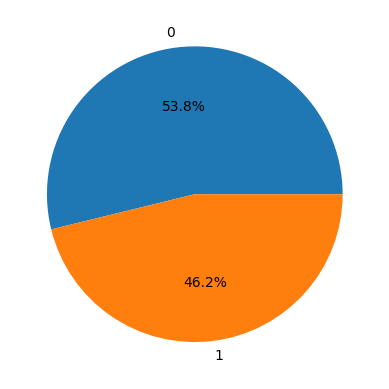

In [15]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


In [16]:
pip install dash


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import numpy as np


df = pd.read_csv('/home/mca/Downloads/BTC-USD (1).csv')



df['Date'] = pd.to_datetime(df['Date'])


df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


app = dash.Dash(__name__)


app.layout = html.Div([
    html.H1('Bitcoin Close Price Dashboard'),
    
    html.Label('Select a date range:'),
    dcc.RangeSlider(
        id='date-range-slider',
        min=df['Date'].min().timestamp(),  
        max=df['Date'].max().timestamp(),  
        step=1,
        marks={df['Date'].min().timestamp(): str(df['Date'].min().date()),  
               df['Date'].max().timestamp(): str(df['Date'].max().date())},
        value=[df['Date'].min().timestamp(), df['Date'].max().timestamp()]  
    ),
    
    dcc.Graph(id='bitcoin-close-price-graph'),
    dcc.Graph(id='pie-chart'),
])


@app.callback(
    Output('bitcoin-close-price-graph', 'figure'),
    Output('pie-chart', 'figure'),  
    Input('date-range-slider', 'value')
)
def update_graph(selected_date_range):
    filtered_df = df[(df['Date'] >= pd.to_datetime(selected_date_range[0], unit='s')) &
                     (df['Date'] <= pd.to_datetime(selected_date_range[1], unit='s'))]
    fig = px.line(filtered_df, x='Date', y='Close', title='Bitcoin Close Price')
    fig.update_xaxes(title='Date')
    fig.update_yaxes(title='Price in Dollars')

    
    pie_data = df[(df['Date'] >= pd.to_datetime(selected_date_range[0], unit='s')) &
                  (df['Date'] <= pd.to_datetime(selected_date_range[1], unit='s'))]['target'].value_counts()
    fig_pie = px.pie(values=pie_data.values, names=pie_data.index, title='Target Distribution')
    
    return fig, fig_pie  
if __name__ == '__main__':
    app.run_server(debug=True, port=8082)


/tmp/ipykernel_8580/2308376121.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipykernel_8580/2308376121.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [18]:
pip install dash


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
!pip install requests


Defaulting to user installation because normal site-packages is not writeable


In [23]:
import requests


cryptocurrency_symbol = 'bitcoin'


url = f'https://api.coingecko.com/api/v3/simple/price?ids={cryptocurrency_symbol}&vs_currencies=usd'
response = requests.get(url)


if response.status_code == 200:
    data = response.json()
    if cryptocurrency_symbol in data:
        price_in_usd = data[cryptocurrency_symbol]['usd']
        print(f'The current price of {cryptocurrency_symbol.capitalize()} is ${price_in_usd:.2f} USD')
    else:
        print(f'Cryptocurrency symbol "{cryptocurrency_symbol}" not found.')
else:
    print('Failed to retrieve data from the API.')



The current price of Bitcoin is $26600.00 USD
